<a href="https://colab.research.google.com/github/osienka/NLP/blob/main/NLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import load_img
to_categorical = tf.keras.utils.to_categorical

from os import listdir
from os.path import join

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
"""conv = []
files = os.listdir('drive/MyDrive/dataset/1/')
print("Liczebność klasy 1:",len(files))
for file in files:
  path = os.path.join('drive/MyDrive/dataset/1/', file)
  img = load_img(path, color_mode='grayscale')
  img_arr = np.asarray(img)
  conv.append(img_arr)
l1 = np.ones(len(files))
files = os.listdir('drive/MyDrive/dataset/2/')
print("Liczebność klasy 2:",len(files))
for file in files:
  path = os.path.join('drive/MyDrive/dataset/2/', file)
  img = load_img(path, color_mode='grayscale')
  img_arr = np.asarray(img)
  conv.append(img_arr)
l2 = np.append(l1,np.full(shape=len(files), fill_value=2))
files = os.listdir('drive/MyDrive/dataset/0/')
print("Liczebność klasy 0:",len(files))
for file in files:
  path = os.path.join('drive/MyDrive/dataset/0/', file)
  img = load_img(path, color_mode='grayscale')
  img_arr = np.asarray(img)
  conv.append(img_arr)
l3 = np.append(l2,np.full(shape=len(files), fill_value=2))
files = os.listdir('drive/MyDrive/dataset/3/')
print("Liczebność klasy 0:",len(files))
for file in files:
  path = os.path.join('drive/MyDrive/dataset/3/', file)
  img = load_img(path, color_mode='grayscale')
  img_arr = np.asarray(img)
  conv.append(img_arr)
Y = np.append(l3, np.full(shape=len(files), fill_value=3))
X = np.array(conv)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("Training data shape before reshaping:", X_train.shape)

X_train = X_train.reshape(X_train.shape+(-1,))
X_test = X_test.reshape(X_test.shape+(-1,))

print("Training data shape after reshaping:", X_train.shape)

maxValue = np.amax(X_train)
print("Maximum value in training data:",maxValue)

X_train = X_train/225
X_test = X_test/225

print("Original label encoding:",Y_train[0], "shape:", Y_train.shape)
depth = 4

Y_train = tf.one_hot(Y_train, depth)
Y_test = tf.one_hot(Y_test, depth)

print("One hot label encoding for training data:", Y_train[0], "shape:", Y_train.shape)
print("One hot label encoding for test data:",Y_test[0], "shape:", Y_test.shape)"""

'conv = []\nfiles = os.listdir(\'drive/MyDrive/dataset/1/\')\nprint("Liczebność klasy 1:",len(files))\nfor file in files:\n  path = os.path.join(\'drive/MyDrive/dataset/1/\', file)\n  img = load_img(path, color_mode=\'grayscale\')\n  img_arr = np.asarray(img)\n  conv.append(img_arr)\nl1 = np.ones(len(files))\nfiles = os.listdir(\'drive/MyDrive/dataset/2/\')\nprint("Liczebność klasy 2:",len(files))\nfor file in files:\n  path = os.path.join(\'drive/MyDrive/dataset/2/\', file)\n  img = load_img(path, color_mode=\'grayscale\')\n  img_arr = np.asarray(img)\n  conv.append(img_arr)\nl2 = np.append(l1,np.full(shape=len(files), fill_value=2))\nfiles = os.listdir(\'drive/MyDrive/dataset/0/\')\nprint("Liczebność klasy 0:",len(files))\nfor file in files:\n  path = os.path.join(\'drive/MyDrive/dataset/0/\', file)\n  img = load_img(path, color_mode=\'grayscale\')\n  img_arr = np.asarray(img)\n  conv.append(img_arr)\nl3 = np.append(l2,np.full(shape=len(files), fill_value=2))\nfiles = os.listdir(\'dr

In [8]:
def load_data(folder, height, width, color):    

    #load images from 'folder' which contains subfolders as labels
    #returns vectors X (inputs) and Y (labels) ready for training/testing
    # list of all subfolders but hidden files
    list_labels = [f for f in listdir(folder) if not f.startswith('.')]

    X = [] # vector of inputs
    Y = [] # vector of labels

    for label in list_labels:
        current_dir = join(folder, label)
        for img_file in listdir(current_dir):
            if not img_file.startswith('.'):
                img = load_img(join(current_dir, img_file), color_mode=color, target_size=(height, width))
                X.append(np.array(img)/255)
                Y.append(int(label))

    X = np.array(X).reshape(-1, height, width, 1) # (N, height, width, channel)           
    Y = to_categorical(Y, len(list_labels)) # one hot encoding
    return X, Y  


# Define the size of the image and the color
height = 45 
width = 60 
color = 'grayscale'

# Load and transform images
X, Y = load_data('drive/MyDrive/dataset', height, width, color)

In [9]:
model = Sequential()
model.add(Conv2D(32,(5,5), activation = "relu", input_shape=(45,60,1),name="layer_1"))
model.add(MaxPooling2D((3,3), name="layer_2"))
model.add(Conv2D(64,(5,5), activation = "relu",name="layer_3"))
model.add(MaxPooling2D((3,3), name="layer_4"))
model.add(Flatten(name="layer_5"))
model.add(Dense(4, activation = "softmax", name="layer_6"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Conv2D)            (None, 41, 56, 32)        832       
                                                                 
 layer_2 (MaxPooling2D)      (None, 13, 18, 32)        0         
                                                                 
 layer_3 (Conv2D)            (None, 9, 14, 64)         51264     
                                                                 
 layer_4 (MaxPooling2D)      (None, 3, 4, 64)          0         
                                                                 
 layer_5 (Flatten)           (None, 768)               0         
                                                                 
 layer_6 (Dense)             (None, 4)                 3076      
                                                                 
Total params: 55,172
Trainable params: 55,172
Non-traina

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Epoch 1/30
5/5 [==============================] - 2s 141ms/step - loss: 1.4067 - accuracy: 0.2000 - val_loss: 1.3904 - val_accuracy: 0.1111
Epoch 2/30
5/5 [==============================] - 0s 94ms/step - loss: 1.3263 - accuracy: 0.3357 - val_loss: 1.2734 - val_accuracy: 0.5556
Epoch 3/30
5/5 [==============================] - 0s 89ms/step - loss: 1.2210 - accuracy: 0.6286 - val_loss: 1.1773 - val_accuracy: 0.6111
Epoch 4/30
5/5 [==============================] - 0s 87ms/step - loss: 1.1309 - accuracy: 0.6429 - val_loss: 1.0761 - val_accuracy: 0.8056
Epoch 5/30
5/5 [==============================] - 0s 90ms/step - loss: 1.0061 - accuracy: 0.8357 - val_loss: 0.9293 - val_accuracy: 0.8333
Epoch 6/30
5/5 [==============================] - 0s 89ms/step - loss: 0.8864 - accuracy: 0.8143 - val_loss: 0.8473 - val_accuracy: 0.8056
Epoch 7/30
5/5 [==============================] - 0s 91ms/step - loss: 0.7353 - accuracy: 0.8643 - val_loss: 0.6439 - val_accuracy: 0.9167
Epoch 8/30
5/5 [==========

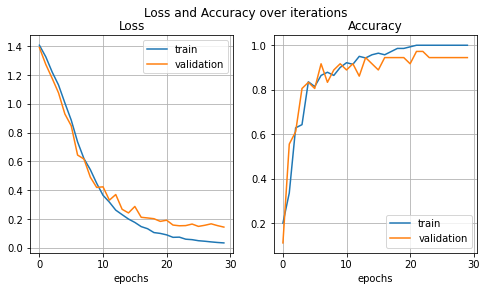

In [13]:
# Save training to 'mymodel'
mymodel = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.2)

# PLOT LOSS AND ACCURACY HISTORY
def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Loss and Accuracy over iterations')
    
    # add_subplot(nrows, ncolumns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['accuracy'], 
                   mymodel.history['val_accuracy'])

# TEST MODEL
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)